In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from sympy import *
from scipy.optimize import minimize
from time import time

In [2]:
from FindZeros import *

In [8]:
# Examples (verifying Cauchy's theorem is satisfied) 
# 1:
def f(z): return z**2 + 1
tst1 = hor_cont(0,1,f) + ver_cont(1,1,f) + hor_cont(1+1j,-1,f) + ver_cont(1j,-1,f)
# 2:
def f(z): return np.sin(10*np.sqrt(z + 1))
tst2 = hor_cont(0,1,f) + ver_cont(1,1,f) + hor_cont(1+1j,-1,f) + ver_cont(1j,-1,f)
# 3:
def f(z): return np.sin(50*np.sqrt(z + 1))
tst3 = hor_cont(0,1,f) + ver_cont(1,1,f) + hor_cont(1+1j,-1,f) + ver_cont(1j,-1,f)

print(tst1,tst2,tst3) # Should be almost zero

(-1.1102230246251565e-16+1.1102230246251565e-16j) (1.4654943925052066e-14+0j) (5.811452865600586e-07-2.980232238769531e-07j)


In [9]:
# Example 1: (f(z) = z)
z = symbols('z')
fexpr = z
df = diff(fexpr,z)
g = lambdify(z,df/fexpr)
f = lambdify(z,fexpr)
def f2(x): return abs(f(x[0]+1j*x[1]))**2
tst1 = FindZeros(-1-1j,2.1,2.1,g,f2)
print(tst1)

[-0.00024414-0.00024414j]


In [10]:
# Example 2: (degree 3 polynomial with known zeros)
z = symbols('z')
fexpr = (z - (- 1 - 1j))*(z - 1)*(z - (1 + 1j))
df = diff(fexpr,z)
g = lambdify(z,df/fexpr)
f = lambdify(z,fexpr)
def f2(x): return abs(f(x[0]+1j*x[1]))**2
tst2 = FindZeros(-2-2j,4.1,4.1,g,f2)
print(tst2)

[-1.00102539-1.00102539e+00j  1.00092773-4.88281250e-05j
  1.00092773+1.00092773e+00j]


11.5086669921875


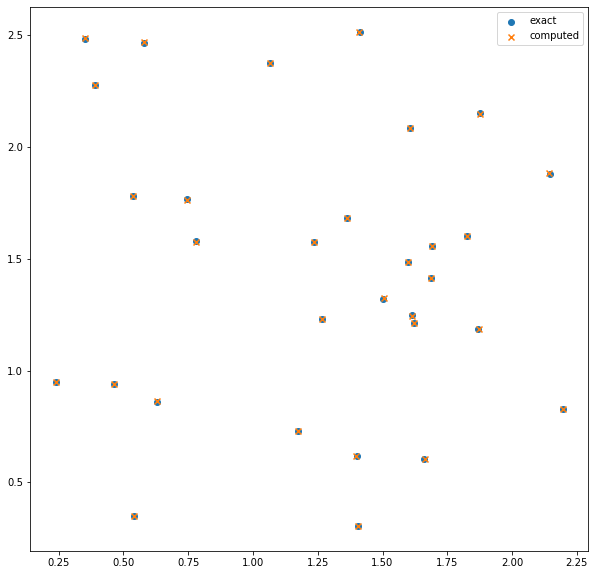

In [13]:
# Example 3: (Big polynomial with known random zeros)
z = symbols('z')
roots = []
root = np.random.triangular(0,1,3) + 1j*np.random.triangular(0,1,3)
fexpr = z - root
roots.append(root)
n = 1
while n <= 30:
    root = np.random.triangular(0,1,3) + 1j*np.random.triangular(0,1,3)
    fexpr = fexpr*(z - root)
    roots.append(root)
    n = n + 1
df = diff(fexpr,z)
g = lambdify(z,df/fexpr)
f = lambdify(z,fexpr)
def f2(x): return abs(f(x[0]+1j*x[1]))**2
t1 = time()
tst3 = FindZeros(0,3,3,g,f2,minit = 10)
t2 = time()
print(t2 - t1)
plt.figure(figsize=(10,10))
plt.scatter(np.array(roots).real,np.array(roots).imag,label='exact')
plt.scatter(np.array(tst3).real,np.array(tst3).imag,label='computed',marker='x')
plt.legend()
plt.show()